In [2]:
import pandas as pd
import numpy as np
import sys
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
##setup google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
##setup path
root_path = '/content/drive/MyDrive/W210 - Capstone Project/data'

In [5]:
##import dataset
df_census = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/census_data.csv', encoding = "ISO-8859-1")
df_broadband = pd.read_csv('/content/drive/MyDrive/W210 - Capstone Project/data/merged_broadband.csv', encoding = 'ISO-8859-1')

# Broadband Data EDA



In [7]:
df_broadband.head()

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
0,0,29639,1742.0,3.0,0.0,8.0,3.0,3.0,5.0,3.0,163.0,93.12,223.75,90%,40.0,3.0,0.0,5.0,3.0,3.0,3.0,3.0,21.0,SC,Abbeville,45001,0.948,0.034,0.110,0.002
1,1,29620,12934.0,6.0,0.0,11.0,5.0,3.0,7.0,3.0,2536.0,212.50,536.35,98%,40.0,6.0,0.0,8.0,3.0,3.0,3.0,3.0,542.0,SC,Abbeville,45001,0.398,0.002,0.007,0.000
2,2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,Abbeville,45001,0.206,0.152,0.608,0.043
3,3,29638,2944.0,6.0,1.0,13.0,4.0,4.0,6.0,4.0,272.0,82.79,222.35,95%,40.0,5.0,0.0,7.0,2.0,2.0,2.0,2.0,68.0,SC,Abbeville,45001,0.369,0.010,0.031,-0.001
4,4,29628,2759.0,4.0,0.0,8.0,3.0,2.0,5.0,2.0,100.0,51.12,126.06,95%,40.0,4.0,0.0,6.0,3.0,3.0,3.0,3.0,102.0,SC,Abbeville,45001,0.221,0.014,0.043,0.000


In [8]:
# check is there any missing values in dataframe as a whole
df_broadband.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32735 entries, 0 to 32734
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Unnamed: 0                                32735 non-null  int64  
 1   Zip                                       32735 non-null  int64  
 2   Population                                29485 non-null  float64
 3   WiredCount_2020                           29485 non-null  float64
 4   Fwcount_2020                              29485 non-null  float64
 5   AllProviderCount_2020                     29485 non-null  float64
 6   Wired25_3_2020                            29485 non-null  float64
 7   Wired100_3_2020                           29485 non-null  float64
 8   All25_3_2020                              29485 non-null  float64
 9   All100_3                                  29485 non-null  float64
 10  TestCount                         

## EDA - Missing Values


### 1.Broadband Merged Datasets

In [9]:
# Get the sum of missing values for each variable.
df_broadband.isnull().sum()

Unnamed: 0                                     0
Zip                                            0
Population                                  3250
WiredCount_2020                             3250
Fwcount_2020                                3250
AllProviderCount_2020                       3250
Wired25_3_2020                              3250
Wired100_3_2020                             3250
All25_3_2020                                3250
All100_3                                    3250
TestCount                                   6553
AverageMbps                                 6553
FastestAverageMbps                          6553
%Access to Terrestrial Broadband            3253
Lowest Priced Terrestrial Broadband Plan    6310
WiredCount_2015                             3252
Fwcount_2015                                3252
AllProviderCount_2015                       3252
Wired25_3_2015                              3252
Wired100_3_2015                             3252
All25_3_2015        

In [10]:
## To calculate the %of missing values for each variable
(
    ( 
        df_broadband.isna()    
       .sum(axis=0)     # count the number of na for each variable (now data is 1 obs per column = # missing)
        /len(df_broadband)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)[:13]
    .to_frame(name='% missing') 
    .style.format("{:.1f}")    
)


,% missing
FastestAverageMbps,20.0
TestCount,20.0
AverageMbps,20.0
Lowest Priced Terrestrial Broadband Plan,19.3
Total_Enrolled_Households,14.8
%Access to Terrestrial Broadband,9.9
All100_3.1,9.9
All25_3_2015,9.9
Wired100_3_2015,9.9
Wired25_3_2015,9.9


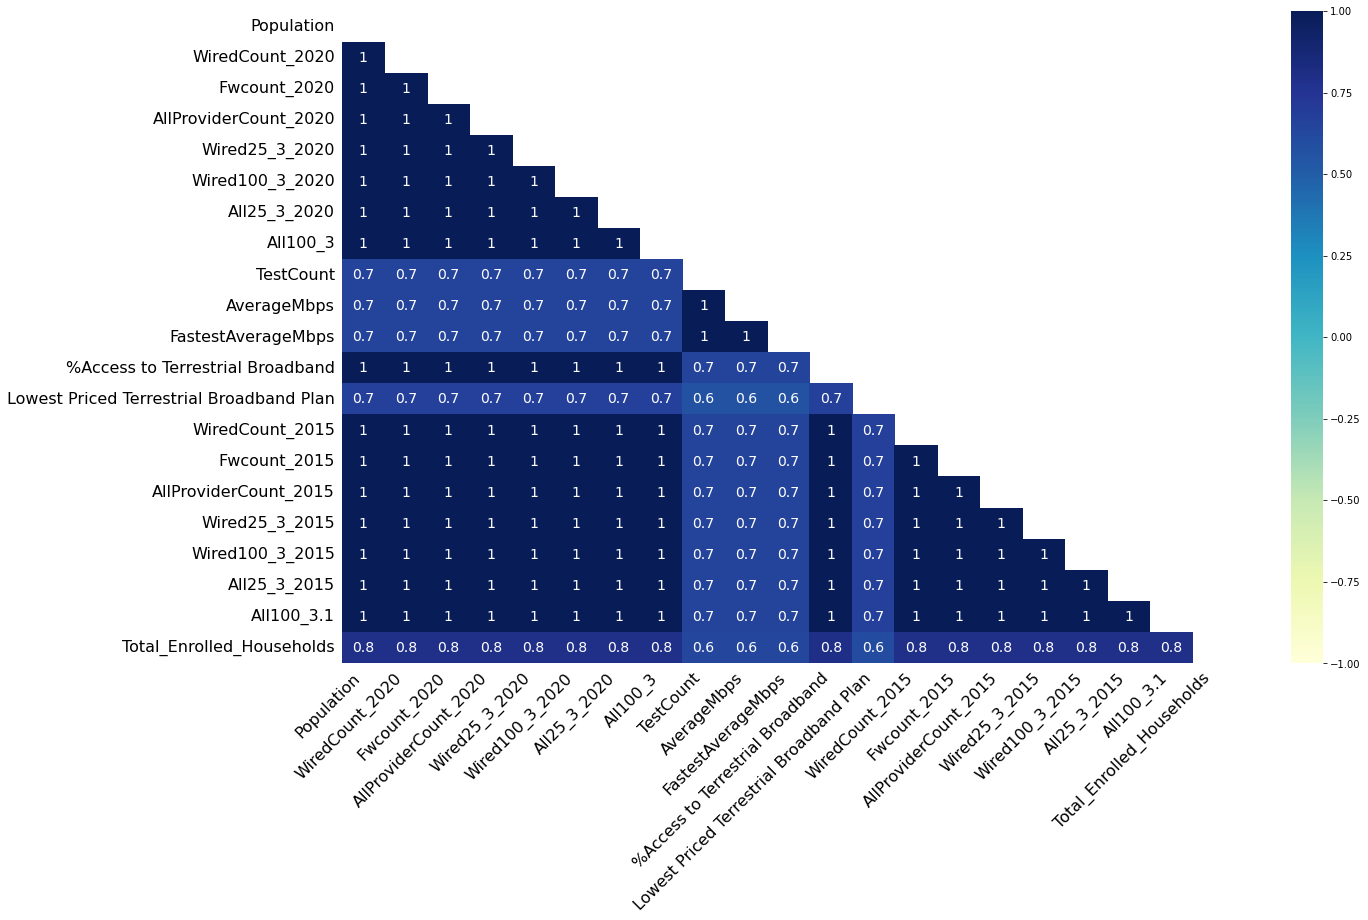

In [11]:
msno.heatmap(df_broadband, cmap='YlGnBu')

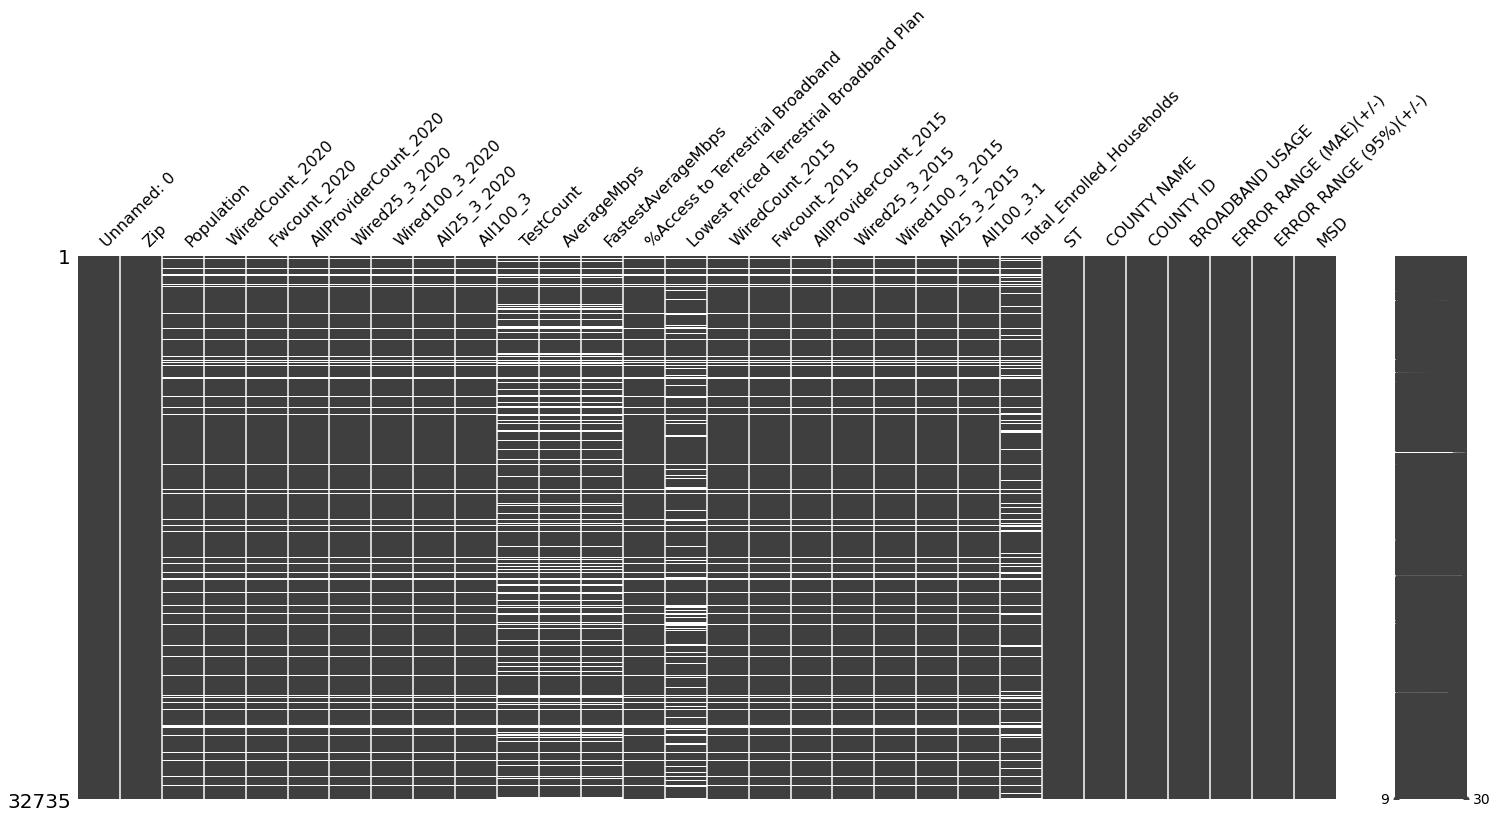

In [12]:
msno.matrix(df_broadband)

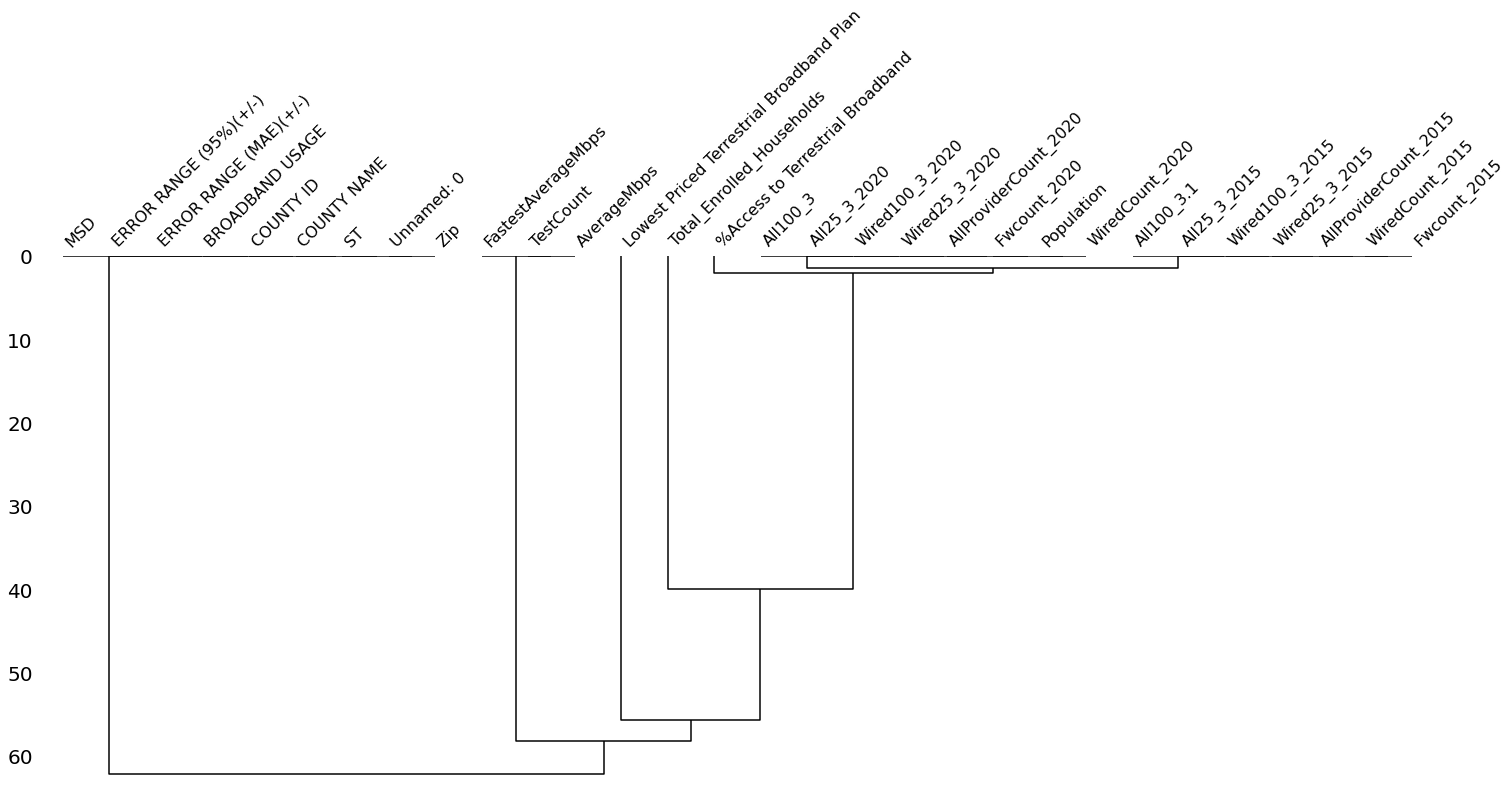

In [13]:
msno.dendrogram(df_broadband)


In [14]:
# To select only the rows with NaN values
df_missing = df_broadband[pd.isnull(df_broadband).any(axis=1)]
df_missing
## Notice that we have 9342 observations/rows that contain one or more missing values. Thats roughly 28.5% of data contains missing values
## We want to then look at if some states/counties have more missing values than others

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
2,2,29659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SC,Abbeville,45001,0.206,0.152,0.608,0.043
11,11,70556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,Acadia Parish,22001,0.139,0.065,0.228,0.013
12,12,70534,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA,Acadia Parish,22001,0.083,0.034,0.110,0.002
19,19,23442,1059.0,3.0,2.0,10.0,1.0,1.0,3.0,1.0,NaN,NaN,NaN,86%,59.99,4.0,1.0,7.0,1.0,1.0,1.0,1.0,27.0,VA,Accomack,51001,0.322,0.027,0.086,0.001
20,20,23480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VA,Accomack,51001,0.000,0.065,0.228,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32723,32723,80727,425.0,2.0,2.0,9.0,1.0,1.0,4.0,2.0,NaN,NaN,NaN,100%,79.95,2.0,0.0,3.0,1.0,0.0,1.0,0.0,3.0,CO,Yuma,8125,0.000,0.065,0.228,0.013
32724,32724,80822,260.0,2.0,1.0,8.0,1.0,1.0,3.0,1.0,175.0,21.74,39.18,97%,79.95,2.0,0.0,3.0,1.0,0.0,1.0,0.0,NaN,CO,Yuma,8125,1.000,0.083,0.302,0.021
32731,32731,78872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TX,Zavala,48507,0.071,0.020,0.061,0.000
32732,32732,57622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SD,Ziebach,46137,0.000,0.110,0.406,0.031


In [15]:
## for each state, we look at how many datapoints are missing for each column
df_missing.set_index('ST').isna().groupby(level=0).sum()

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
ST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,73,73,73,0,199,0,0,0,0,0,0,0,96,0,0,0,0,0,0
AL,0,0,44,44,44,44,44,44,44,44,122,122,122,44,116,44,44,44,44,44,44,44,58,0,0,0,0,0,0
AR,0,0,64,64,64,64,64,64,64,64,202,202,202,64,213,64,64,64,64,64,64,64,86,0,0,0,0,0,0
AZ,0,0,98,98,98,98,98,98,98,98,118,118,118,98,134,98,98,98,98,98,98,98,103,0,0,0,0,0,0
CA,0,0,174,174,174,174,174,174,174,174,250,250,250,174,303,175,175,175,175,175,175,175,240,0,0,0,0,0,0
CO,0,0,82,82,82,82,82,82,82,82,132,132,132,83,143,82,82,82,82,82,82,82,116,0,0,0,0,0,0
CT,0,0,14,14,14,14,14,14,14,14,22,22,22,14,14,14,14,14,14,14,14,14,17,0,0,0,0,0,0
DC,0,0,0,0,0,0,0,0,0,0,3,3,3,0,1,0,0,0,0,0,0,0,6,0,0,0,0,0,0
DE,0,0,7,7,7,7,7,7,7,7,12,12,12,7,7,7,7,7,7,7,7,7,10,0,0,0,0,0,0


In [17]:
## what percentage of datapoints are missing by State
df_broadband.groupby('ST').apply(lambda x: x.isnull().sum()/len(x)*100)


,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
ST,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AK,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.083665,29.083665,29.083665,0.000000,79.282869,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.247012,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AL,0.0,0.0,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,19.122257,19.122257,19.122257,6.896552,18.181818,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,6.896552,9.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AR,0.0,0.0,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,34.295416,34.295416,34.295416,10.865874,36.162988,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,10.865874,14.601019,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZ,0.0,0.0,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,29.573935,29.573935,29.573935,24.561404,33.583960,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,24.561404,25.814536,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CA,0.0,0.0,10.023041,10.023041,10.023041,10.023041,10.023041,10.023041,10.023041,10.023041,14.400922,14.400922,14.400922,10.023041,17.453917,10.080645,10.080645,10.080645,10.080645,10.080645,10.080645,10.080645,13.824885,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CO,0.0,0.0,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,25.680934,25.680934,25.680934,16.147860,27.821012,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,15.953307,22.568093,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CT,0.0,0.0,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,7.913669,7.913669,7.913669,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,5.035971,6.115108,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DC,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,10.000000,10.000000,0.000000,3.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DE,0.0,0.0,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,18.750000,18.750000,18.750000,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,10.937500,15.625000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###1.1 Broadband Data - AR

In [21]:
## Creating an AR df of just AR zipcodes that were in the zips df
ar_df = df_broadband[df_broadband.ST=="AR"]
ar_df

##589 zip codes

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
890,890,72003,746.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,164.0,11.26,20.40,1%,NaN,1.0,0.0,3.0,1.0,0.0,1.0,0.0,8.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
891,891,72048,114.0,1.0,1.0,6.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0%,NaN,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,AR,Arkansas,5001,1.000,0.197,0.869,0.022
892,892,72055,849.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,2.0,18.20,19.47,52%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
893,893,72073,1139.0,1.0,1.0,7.0,0.0,0.0,2.0,0.0,12.0,1.44,1.69,0%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,21.0,AR,Arkansas,5001,0.086,0.027,0.086,0.001
894,894,72026,393.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,6.0,2.49,4.47,24%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,AR,Arkansas,5001,0.000,0.065,0.228,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32516,32516,72857,1430.0,2.0,1.0,8.0,1.0,1.0,4.0,3.0,124.0,52.90,110.27,69%,19.95,1.0,0.0,3.0,1.0,0.0,1.0,0.0,23.0,AR,Yell,5149,0.435,0.023,0.072,0.000
32517,32517,72833,4384.0,2.0,0.0,6.0,1.0,1.0,3.0,2.0,444.0,29.87,61.90,87%,19.95,4.0,0.0,6.0,2.0,1.0,2.0,1.0,42.0,AR,Yell,5149,0.500,0.010,0.031,-0.001
32518,32518,72827,187.0,1.0,0.0,5.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,57%,19.95,1.0,0.0,3.0,0.0,0.0,0.0,0.0,8.0,AR,Yell,5149,0.185,0.110,0.406,0.031
32519,32519,72860,375.0,3.0,0.0,7.0,2.0,1.0,4.0,2.0,3.0,36.20,83.98,100%,19.95,2.0,0.0,4.0,1.0,0.0,1.0,0.0,4.0,AR,Yell,5149,0.258,0.050,0.170,0.007


In [22]:
## To calculate the %of missing values for each variable for AR
(
    ( 
        ar_df.isna()    
       .sum(axis=0)     # count the number of na for each variable (now data is 1 obs per column = # missing)
        /len(ar_df)       # convert # missing to % missing 
        *100            # report as percentage
    ) 
    .sort_values(ascending=False)[:13]
    .to_frame(name='% missing') 
    .style.format("{:.1f}")    
)


,% missing
Lowest Priced Terrestrial Broadband Plan,36.2
FastestAverageMbps,34.3
TestCount,34.3
AverageMbps,34.3
Total_Enrolled_Households,14.6
%Access to Terrestrial Broadband,10.9
All100_3.1,10.9
All25_3_2015,10.9
Wired100_3_2015,10.9
Wired25_3_2015,10.9


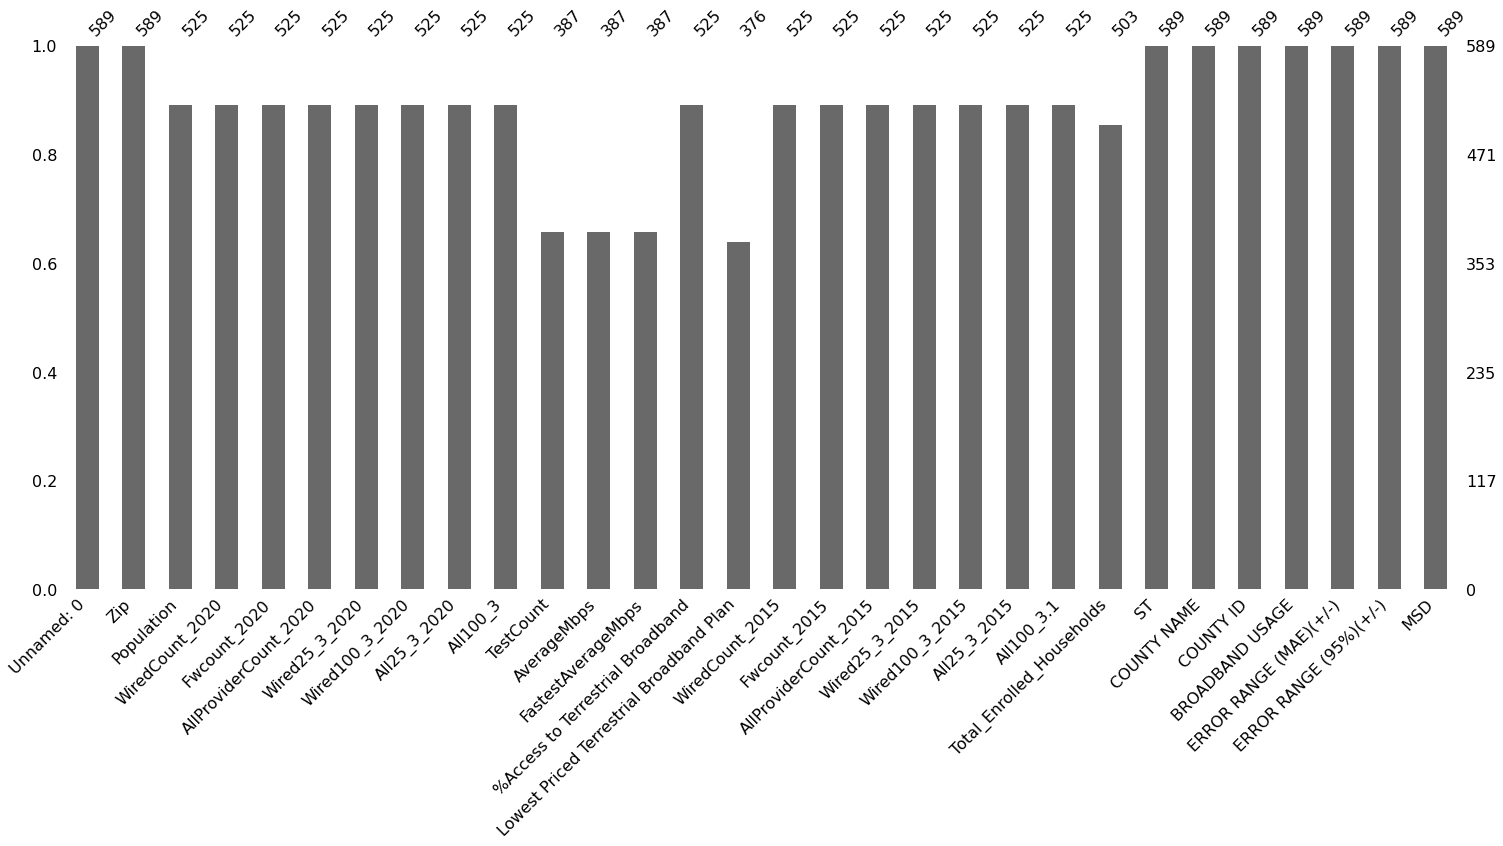

In [ ]:
msno.bar(ar_df)


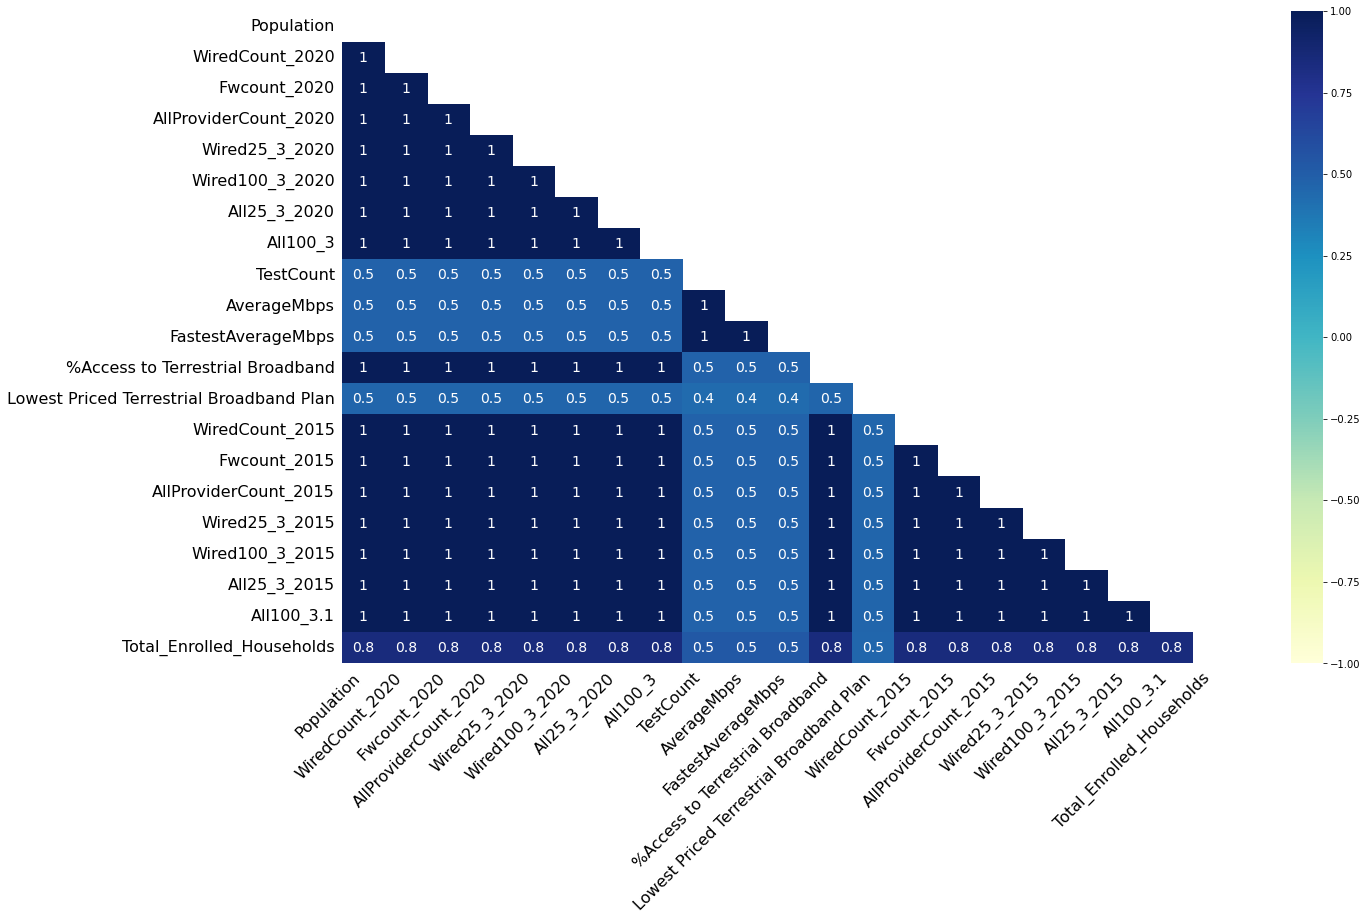

In [ ]:
msno.heatmap(ar_df, cmap='YlGnBu')

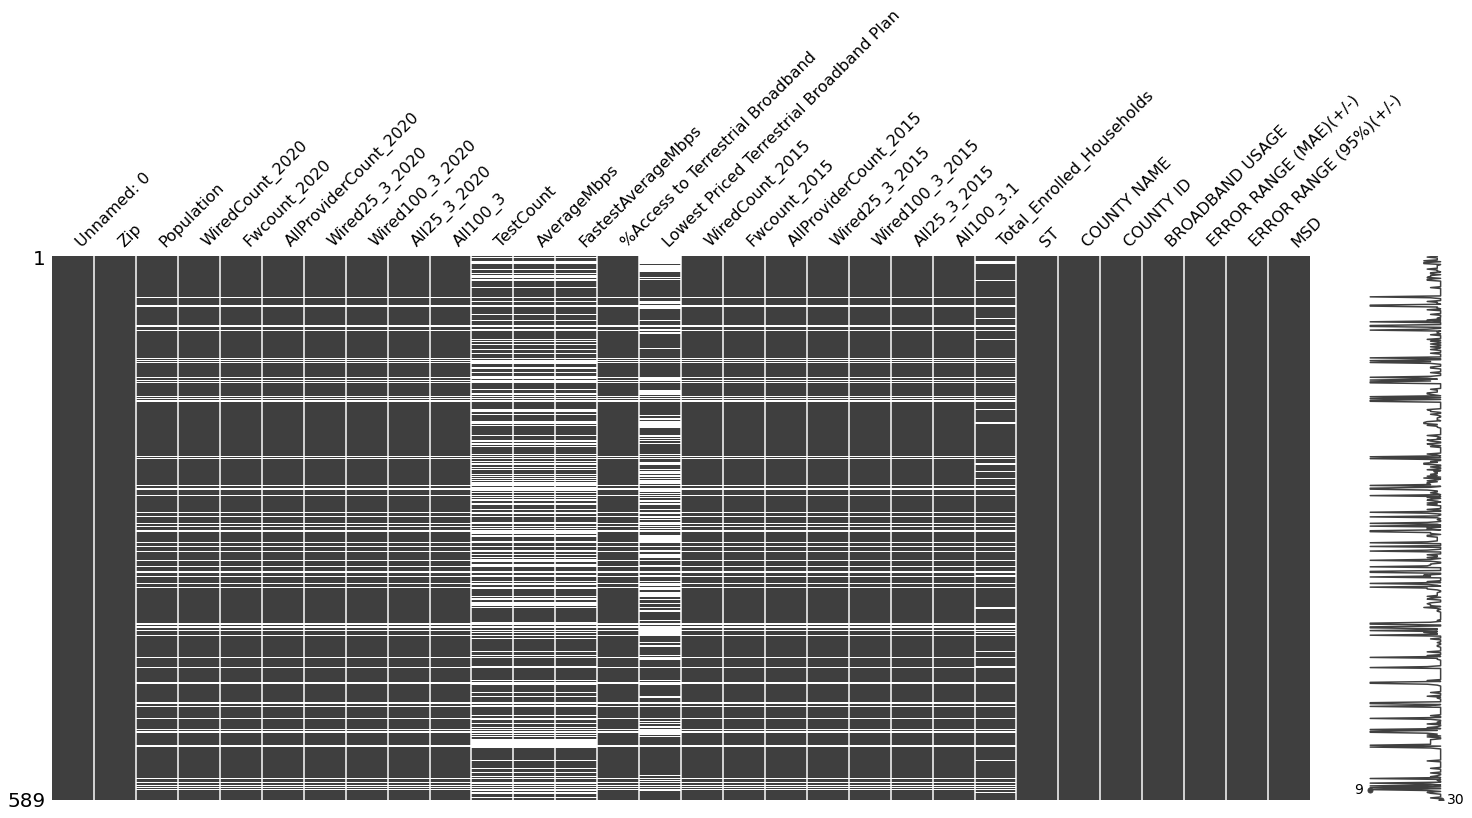

In [ ]:
msno.matrix(ar_df)


In [23]:
# To select only the rows with NaN values
ar_df_missing = ar_df[pd.isnull(ar_df).any(axis=1)]
ar_df_missing
## Notice that we have 286 observations/rows that contain one or more missing values. Thats roughly 48.6% of data contains missing values

,Unnamed: 0,Zip,Population,WiredCount_2020,Fwcount_2020,AllProviderCount_2020,Wired25_3_2020,Wired100_3_2020,All25_3_2020,All100_3,TestCount,AverageMbps,FastestAverageMbps,%Access to Terrestrial Broadband,Lowest Priced Terrestrial Broadband Plan,WiredCount_2015,Fwcount_2015,AllProviderCount_2015,Wired25_3_2015,Wired100_3_2015,All25_3_2015,All100_3.1,Total_Enrolled_Households,ST,COUNTY NAME,COUNTY ID,BROADBAND USAGE,ERROR RANGE (MAE)(+/-),ERROR RANGE (95%)(+/-),MSD
890,890,72003,746.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,164.0,11.26,20.40,1%,NaN,1.0,0.0,3.0,1.0,0.0,1.0,0.0,8.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
891,891,72048,114.0,1.0,1.0,6.0,0.0,0.0,2.0,0.0,NaN,NaN,NaN,0%,NaN,3.0,0.0,5.0,0.0,0.0,0.0,0.0,1.0,AR,Arkansas,5001,1.000,0.197,0.869,0.022
892,892,72055,849.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,2.0,18.20,19.47,52%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,AR,Arkansas,5001,0.000,0.034,0.110,0.002
893,893,72073,1139.0,1.0,1.0,7.0,0.0,0.0,2.0,0.0,12.0,1.44,1.69,0%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,21.0,AR,Arkansas,5001,0.086,0.027,0.086,0.001
894,894,72026,393.0,1.0,0.0,5.0,1.0,0.0,3.0,0.0,6.0,2.49,4.47,24%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,AR,Arkansas,5001,0.000,0.065,0.228,0.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32171,32171,72123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AR,Woodruff,5147,0.133,0.065,0.228,0.013
32172,32172,72036,817.0,1.0,1.0,7.0,1.0,0.0,3.0,0.0,NaN,NaN,NaN,2%,NaN,1.0,0.0,3.0,0.0,0.0,0.0,0.0,31.0,AR,Woodruff,5147,0.000,0.034,0.110,0.002
32512,32512,72828,114.0,1.0,0.0,5.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,100%,19.95,1.0,0.0,3.0,0.0,0.0,0.0,0.0,NaN,AR,Yell,5149,1.000,0.197,0.869,0.022
32513,32513,72838,115.0,1.0,0.0,4.0,1.0,1.0,3.0,2.0,NaN,NaN,NaN,100%,19.95,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,AR,Yell,5149,0.392,0.152,0.608,0.043


###2.Census Dataset

In [ ]:
df_census.isnull().sum()

## looks like there's no missing values for the variables we are looking at in the census datesets

Unnamed: 0        0
NAME              0
B01002_001E       0
B01002_002E       0
B01002_003E       0
B15003_001E       0
B15003_017E       0
B15003_018E       0
B15003_019E       0
B15003_020E       0
B15003_021E       0
B15003_022E       0
B15003_023E       0
B15003_024E       0
B15003_025E       0
B28002_001E       0
B28002_002E       0
B28002_003E       0
B28002_004E       0
B28002_005E       0
B28002_006E       0
B28002_007E       0
B28002_008E       0
B28002_009E       0
B28002_010E       0
B28002_011E       0
B28002_012E       0
B28002_013E       0
B28003_001E       0
B28003_002E       0
B28003_003E       0
B28003_004E       0
B28003_005E       0
B28003_006E       0
state             0
county            0
tract             0
S2301_C03_001E    0
S1701_C02_001E    0
S1701_C01_001E    0
S1901_C01_012E    0
S1101_C01_001E    0
S1101_C01_002E    0
S1101_C01_004E    0
DP04_0142PE       0
DP04_0141PE       0
DP05_0001E        0
DP04_0089E        0
DP05_0077PE       0
DP05_0071PE       0
